#    1)Data Loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
houses_data=pd.read_csv("data.csv")
pd.set_option('display.max_colwidth', None)
houses_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
houses_data.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [5]:
# Large Missing Values can be Seen

In [6]:
houses_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# 2)Sanity Check

In [7]:
print("Data shape:", houses_data.shape)
print("\nMissing values per column:")
missing_values = houses_data.isnull().sum()
print(missing_values[missing_values > 0] ) 

Data shape: (1460, 81)

Missing values per column:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


# 3)EDA Visualization

<Figure size 1200x600 with 0 Axes>

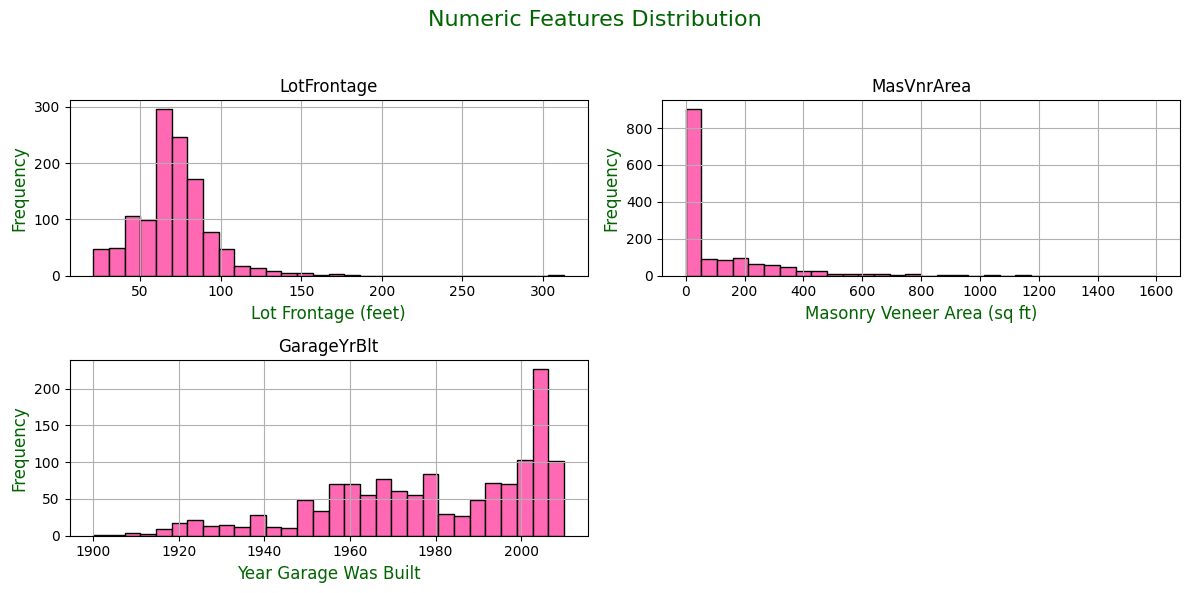

In [8]:
plt.figure(figsize=(12,6))
numeric_cols = houses_data.select_dtypes(include='float64').columns

axes = houses_data[numeric_cols].hist(
    bins=30,
    color='hotpink',
    edgecolor='black',
    figsize=(12, 6)
)
custom_labels = {
    'LotFrontage': 'Lot Frontage (feet)',
    'MasVnrArea': 'Masonry Veneer Area (sq ft)',
    'GarageYrBlt': 'Year Garage Was Built'
}
for ax, col in zip(axes.flatten(), numeric_cols):
    xlabel = custom_labels.get(col, col) 
    ax.set_xlabel(xlabel, color='darkgreen', fontsize=12)
    ax.set_ylabel('Frequency', color='darkgreen', fontsize=12)
plt.suptitle('Numeric Features Distribution',color='darkgreen',size='16')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('Numeric_distribution_hist.png')
plt.show()

In [9]:
'''Summary:
LotFrontage - Most houses have moderate frontage, a few are very large (possible outliers).
MasVnrArea  - 	Majority of homes have little to no masonry veneer.
GarageYrBlt  - 	Many garages built post-2000, and a spread over 1950–2000. Reflects development trends.'''

'Summary:\nLotFrontage - Most houses have moderate frontage, a few are very large (possible outliers).\nMasVnrArea  - \tMajority of homes have little to no masonry veneer.\nGarageYrBlt  - \tMany garages built post-2000, and a spread over 1950–2000. Reflects development trends.'

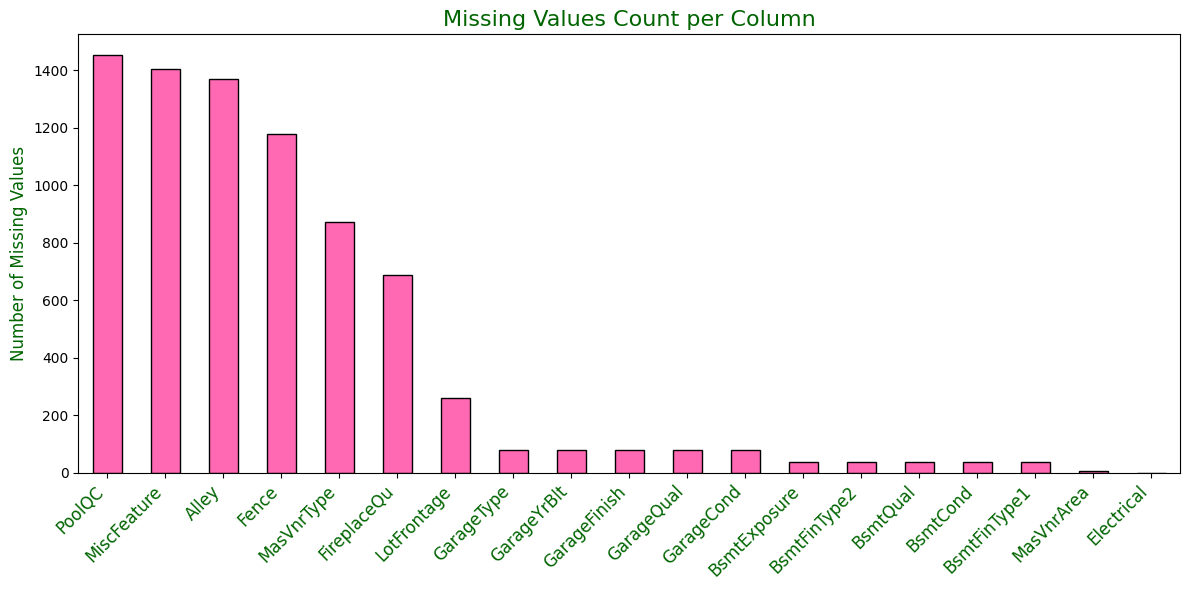

In [10]:
missing = houses_data.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
missing.plot(kind='bar', color='hotpink', edgecolor='black')
plt.title('Missing Values Count per Column',color='darkgreen',size='16')
plt.ylabel('Number of Missing Values',color='darkgreen',size=12)
plt.xticks(rotation=45, ha='right',color='darkgreen',size=12)
plt.tight_layout()
plt.savefig('missing_barplot.png')
plt.show()

In [11]:
''' Summary:
- 'PoolQC', 'MiscFeature', 'Alley', and 'Fence' have the highest missing values (>1000), likely optional features.
- 'FireplaceQu', 'LotFrontage', and 'GarageType' show moderate missingness and need proper imputation.
- Columns like 'Electrical' and 'MasVnrArea' have minimal missing data and can be easily filled.
- Consider dropping columns with excessive missingness if not critical, and imputing others using domain knowledge.'''

" Summary:\n- 'PoolQC', 'MiscFeature', 'Alley', and 'Fence' have the highest missing values (>1000), likely optional features.\n- 'FireplaceQu', 'LotFrontage', and 'GarageType' show moderate missingness and need proper imputation.\n- Columns like 'Electrical' and 'MasVnrArea' have minimal missing data and can be easily filled.\n- Consider dropping columns with excessive missingness if not critical, and imputing others using domain knowledge."

# 4)Data Preprocessing

### a)Dropping Columns

In [12]:
drop_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
houses_data.drop(columns=drop_cols, inplace=True)

### b)Missing Value Treatment

In [13]:
num_cols = houses_data.select_dtypes(include=['int64','float64']).columns
houses_data.loc[:, num_cols] = houses_data.loc[:, num_cols].fillna(houses_data.loc[:, num_cols].median())

In [14]:
cat_cols = houses_data.select_dtypes(include=['object']).columns
houses_data.loc[:, cat_cols] = houses_data.loc[:, cat_cols].fillna(houses_data.loc[:, cat_cols].mode().iloc[0])

In [15]:
print("\nMissing values after treatment:", houses_data.isnull().sum().sum())


Missing values after treatment: 0


In [16]:
'''Missing Value Treatment:
- Numeric columns: filled with median (middle value)
- Categorical columns: filled with most frequent value'''

'Missing Value Treatment:\n- Numeric columns: filled with median (middle value)\n- Categorical columns: filled with most frequent value'

###       c)Duplicate & Garbage Values

In [17]:
print("\nDuplicate rows:", houses_data.duplicated().sum())
houses_data.drop_duplicates(inplace=True)


Duplicate rows: 0


In [18]:
for col in cat_cols:
    print(f"\n{col} unique values:", houses_data[col].unique()[:5])


MSZoning unique values: ['RL' 'RM' 'C (all)' 'FV' 'RH']

Street unique values: ['Pave' 'Grvl']

LotShape unique values: ['Reg' 'IR1' 'IR2' 'IR3']

LandContour unique values: ['Lvl' 'Bnk' 'Low' 'HLS']

Utilities unique values: ['AllPub' 'NoSeWa']

LotConfig unique values: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

LandSlope unique values: ['Gtl' 'Mod' 'Sev']

Neighborhood unique values: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel']

Condition1 unique values: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe']

Condition2 unique values: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN']

BldgType unique values: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']

HouseStyle unique values: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer']

RoofStyle unique values: ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat']

RoofMatl unique values: ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran']

Exterior1st unique values: ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace']

Exterior2nd unique values: ['VinylSd' 'MetalSd' 'Wd Shng

In [19]:
#Checking Categorial Values for Inconsistencies

# 5)Model Building

### a)Feature Engineering

In [20]:
# Selecting relevant features and target
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
target = 'SalePrice'

In [21]:
X = houses_data[features]
y = houses_data[target]

In [22]:
X = pd.get_dummies(X, columns=['OverallQual', 'GarageCars', 'FullBath'], drop_first=True)
# Converting categorical features to dummy variables

In [23]:
scaler = RobustScaler()
num_cols = ['GrLivArea', 'TotalBsmtSF', 'YearBuilt']
X[num_cols] = scaler.fit_transform(X[num_cols])
# Scaling numerical features

### b)Train-Test Split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### c)Model Training & Evaluation

In [25]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(kernel='rbf')
}

In [26]:
model_scores = {}

print("\n\033[1mMODEL EVALUATION\033[0m")
print("="*50)

for name, model in models.items():
    if name == "Lasso Regression":
        model.set_params(max_iter=10000, alpha=0.01) 
    
    model.fit(X_train, y_train)
    
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, 
                               scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores)

    model_scores[name] = {
        'Model': model,
        'CV Mean RMSE': cv_rmse.mean(),
        'CV Std RMSE': cv_rmse.std(),
        'R2 Score': model.score(X_test, y_test)
    }
    
    print(f"\n{name}:")
    print(f"  CV Mean RMSE: {cv_rmse.mean():.2f}")
    print(f"  CV Std RMSE: {cv_rmse.std():.2f}")
    print(f"  R2 Score: {model_scores[name]['R2 Score']:.4f}")
    


MODEL EVALUATION

Linear Regression:
  CV Mean RMSE: 36534.70
  CV Std RMSE: 7070.06
  R2 Score: 0.8383

Ridge Regression:
  CV Mean RMSE: 36454.14
  CV Std RMSE: 7274.63
  R2 Score: 0.8382

Lasso Regression:
  CV Mean RMSE: 36534.59
  CV Std RMSE: 7070.00
  R2 Score: 0.8383

Random Forest:
  CV Mean RMSE: 35395.87
  CV Std RMSE: 6399.91
  R2 Score: 0.8889

Gradient Boosting:
  CV Mean RMSE: 36218.37
  CV Std RMSE: 6634.04
  R2 Score: 0.8833

SVR:
  CV Mean RMSE: 78778.98
  CV Std RMSE: 5370.04
  R2 Score: -0.0233


### d)Best Model Hypertuning

In [27]:
from sklearn.model_selection import GridSearchCV

best_model_name = "Random Forest"
best_model = model_scores[best_model_name]['Model']

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=best_model,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

tuned_model = grid_search.best_estimator_


Fitting 3 folds for each of 108 candidates, totalling 324 fits


### e)Final Model Evaluation

In [31]:
print("\n\033[1mFINAL MODEL EVALUATION\033[0m")
print("="*50)

# Make predictions
y_pred = tuned_model.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nBest Model: {best_model_name}")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Test RMSE: {rmse:.2f}")
print(f"Test R2 Score: {r2:.4f}")


FINAL MODEL EVALUATION

Best Model: Random Forest
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Test RMSE: 31639.59
Test R2 Score: 0.8695


### f)Feature Importance Visualization

In [32]:
if hasattr(tuned_model, 'feature_importances_'):
    print("\nFeature Importances:")
    feature_importances = pd.DataFrame({
        'Feature': X.columns,
        'Importance': tuned_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print(feature_importances)



Feature Importances:
           Feature  Importance
14    GarageCars_3    0.319837
0        GrLivArea    0.314706
1      TotalBsmtSF    0.134999
2        YearBuilt    0.134694
9    OverallQual_8    0.029127
13    GarageCars_2    0.013274
8    OverallQual_7    0.012521
10   OverallQual_9    0.011880
6    OverallQual_5    0.008228
11  OverallQual_10    0.004583
16      FullBath_1    0.003799
18      FullBath_3    0.003271
7    OverallQual_6    0.003048
5    OverallQual_4    0.001916
17      FullBath_2    0.001678
12    GarageCars_1    0.001307
4    OverallQual_3    0.001099
15    GarageCars_4    0.000026
3    OverallQual_2    0.000007


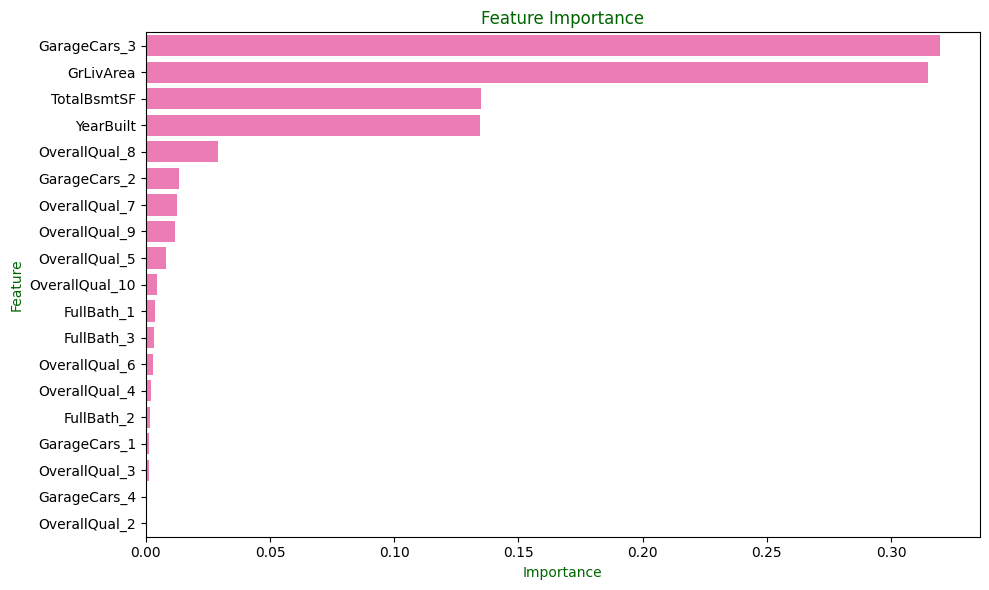

In [33]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='Importance', y='Feature', data=feature_importances,color='hotpink')
plt.title('Feature Importance',color='darkgreen')
ax.set_xlabel('Importance', color='darkgreen')
ax.set_ylabel('Feature', color='darkgreen')
plt.tight_layout()
plt.savefig('FeatureImportance.png')
plt.show()

In [31]:
'''
-Top Features: GarageCars_3, GrLivArea, and TotalBsmtsF are the most influential.
-Moderate Impact: YearBuilt, OverallQual_8, and GarageCars_2 also contribute significantly.
-Lower Impact: Features like OverallQual_2 and GarageCars_4 have minimal importance.
-Range: Importance values span from 0.00 to 0.30, with the highest feature (GarageCars_3) near 0.30.
'''

'\n-Top Features: GarageCars_3, GrLivArea, and TotalBsmtsF are the most influential.\n-Moderate Impact: YearBuilt, OverallQual_8, and GarageCars_2 also contribute significantly.\n-Lower Impact: Features like OverallQual_2 and GarageCars_4 have minimal importance.\n-Range: Importance values span from 0.00 to 0.30, with the highest feature (GarageCars_3) near 0.30.\n'

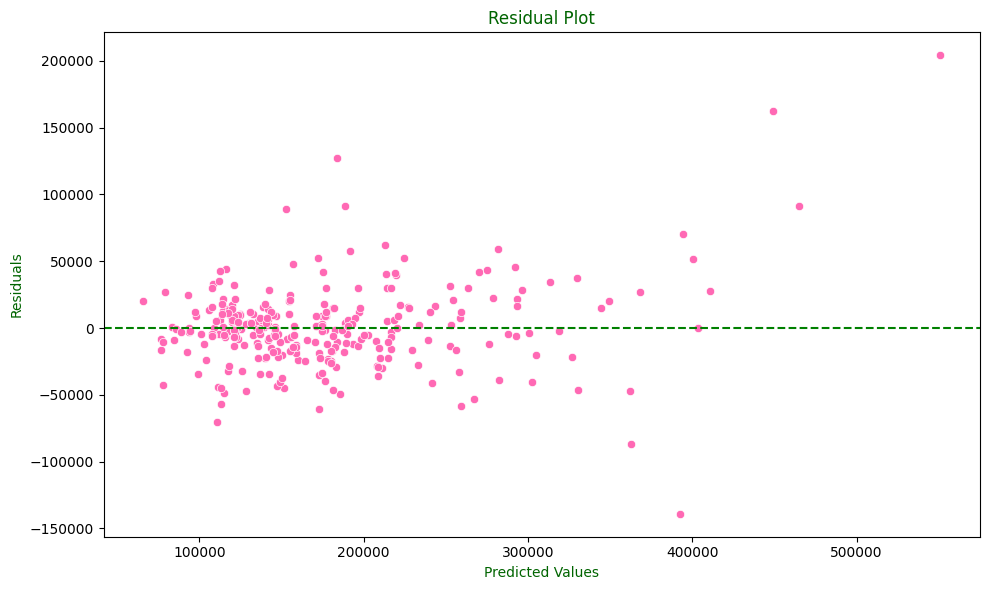

In [34]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals,color='hotpink')
plt.axhline(y=0, color='g', linestyle='--')
plt.xlabel('Predicted Values',color='darkgreen')
plt.ylabel('Residuals',color='darkgreen')
plt.title('Residual Plot',color='darkgreen')
plt.tight_layout()
plt.savefig("ResidualPlot.png")
plt.show()


In [32]:
'''
-Residual Range: Residuals vary widely, spanning from 100,000 to 500,000.
-Residuals at higher predicted values suggest potential heteroscedasticity (uneven variance).
-Model Accuracy: High residual magnitudes indicate possible model inaccuracies or outliers.
'''

'\n-Residual Range: Residuals vary widely, spanning from 100,000 to 500,000.\n-Residuals at higher predicted values suggest potential heteroscedasticity (uneven variance).\n-Model Accuracy: High residual magnitudes indicate possible model inaccuracies or outliers.\n'

### g) Pickling the model and vectorizer

In [70]:
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('best_model.pkl', 'wb') as f:
    pickle.dump(tuned_model, f)

print("\nModel and scaler saved as best_model.pkl and scaler.pkl")


Model and scaler saved as best_model.pkl and scaler.pkl


In [30]:
'''
1) Data Loading:
 -Loaded the dataset using pandas.
 -Displayed basic information using .head() and .describe() to understand column types and distributions.

2) Sanity Check
 -Performed initial checks to validate data consistency.
 -Ensured appropriate data types and checked for basic anomalies.

3) EDA Visualization
 -Used plots (e.g., histograms, bar charts) for exploratory analysis.
 -Identified distribution patterns and variable relationships.

4) Data Preprocessing
 a) Dropping columns
 -dropped columns with large missing values

 b) Missing Value
 -Detected missing values using .isnull() and visualizations like heatmaps.
 -Helped determine the scope and treatment of missing data.

 c) Duplicate & Garbage Values
 -Removed duplicate records to prevent data redundancy.
 -Cleaned garbage values or irrelevant data entries.

5)Model Building
 a)Feature engineering
 -Categorical variables (e.g., 'MSZoning') encoded via DictVectorizer for numerical modeling.  
 -Numerical features (e.g., 'SalePrice') scaled using RobustScaler to handle outliers.  
 -Why: Models require numerical input; scaling ensures feature comparability.  

 b)Model Training
 -Tested Linear (Ridge, Lasso), Ensemble (RandomForest), and SVM models.  
 -Metrics: MSE (error magnitude) and R² (variance explained).  
 -Likely selected RandomForest/GradientBoosting due to their robustness with mixed data types.  
 -Why: Ensemble methods handle non-linear relationships and feature importance well.  c)Hypermenter Tuning

 c)Hypermenter Tuning
 -GridSearchCV to optimize model parameters (e.g., n_estimators for RandomForest).
 -Goal: Maximize R²/minimize MSE by fine-tuning RandomForest Model complexity and avoiding overfitting. 

6)Pickling
 -Steps: Bundle preprocessing (scaling, encoding) and model into a single Pipeline object.  
 -Goal: Ensure consistent transformations during training/inference. 
 '''
 

"\n1) Data Loading:\n -Loaded the dataset using pandas.\n -Displayed basic information using .head() and .describe() to understand column types and distributions.\n\n2) Sanity Check\n -Performed initial checks to validate data consistency.\n -Ensured appropriate data types and checked for basic anomalies.\n\n3) EDA Visualization\n -Used plots (e.g., histograms, bar charts) for exploratory analysis.\n -Identified distribution patterns and variable relationships.\n\n4) Data Preprocessing\n a) Dropping columns\n -dropped columns with large missing values\n\n b) Missing Value\n -Detected missing values using .isnull() and visualizations like heatmaps.\n -Helped determine the scope and treatment of missing data.\n\n c) Duplicate & Garbage Values\n -Removed duplicate records to prevent data redundancy.\n -Cleaned garbage values or irrelevant data entries.\n\n5)Model Building\n a)Feature engineering\n -Categorical variables (e.g., 'MSZoning') encoded via DictVectorizer for numerical modeling.